# Homework 6: Advection and Diffusion

Megan Sharkey
October 1 2025

#### Objective:
In this homework, we will investigate the comparative magnitudes of advection and diffusion of heat in the ocean. For this exercise, we will use the `global_ocean_ebm` model from the last homework. 

#### Import Modules:
Begin by importing the modules to read in data, conduct calculations, and make plots.

In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Modify and Rerun the Model

To obtain the fields necessary for this homework, modify the `global_ocean_ebm` model to output the following diagnostics:

|Field Name|Output File|Frequency|Description|
|---------|--------|---------|-------|
ADVx_TH | diags/ADVx_TH/ADVx_TH | -2592000 | Heat advection in the east-west direction |
|ADVy_TH | diags/ADVy_TH/ADVy_TH | -2592000 | Heat advection in the north-south direction |
|DFxE_TH | diags/DFxE_TH/DFxE_TH | -2592000 | Heat diffusion in the east-west direction |
|DFyE_TH | diags/DFyE_TH/DFyE_TH | -2592000 | Heat diffusion in the north-south direction |

Run your model on Spartan with these diagnostics for a year after a reasonable model spin up.

Then, download your output from Spartan into a "run" directory on your local machine or hard drive. Define the path to your run directory here.

In [24]:
run_folder = '/Users/msharkey/Documents/MLML/FALL 2025/MS 274/homework/week 6 hw/run'

## Part 2: The Heat Equation
In the space below, write down the equation that describes the evolution of temperature in the ocean. Then, for each term in the equation, write one sentence to describe what the term means qualitatively.

Turned in on canvas!

Explanations also on canvas!

## Part 3: Considering Temperature
In class, we wrote the temperature equation with the symbol $\Theta$. What does this term signify and why do we use it instead of temperature $T$?


We wrote the temperature equation with potential temperature, indicated by the symbol $\Theta$ to account for the change in temperature at different pressures. Using potential temperature, we can examine change in temperature adiabatically (without exchange with outside conditions i.e. heat) that would otherwise complicate calculations and comparisons as water with the same temperature at two different depths does not have the same amount of heat. 


## Part 4: Read in the data
As shown above, the `ADVx_TH`, `ADVy_TH`, `DFxE_TH` and `DFyE_TH` variables refer to the $x$- and $y$-components of advection and diffusion (vector quantities). The $x$-component is aligned roughly eastward and the $y$-component is aligned roughly northward near the equator. Read in the 4 advection and diffusion fields. The units of these fields are  $^{\circ}$C$\cdot$m$^3$/s - a transport of temperature with volume. The quantity can by converted to a heat flux (in units of $W$) by considering specific heat ($C_p$) and the density $\rho_w$ of seawater. It is not necessary to make this conversion in this homework.

In addition to the 4 fields above, also read in the fields `XC` and `YC` grids generated by the model in your run directory:

In [25]:
n_rows = 40 
n_cols = 90
n_depth_levels = 15
day = 155535


ADVx_TH_file = os.path.join(run_folder, 'diags', 'ADVx_TH', 'ADVx_TH.' + '{:010d}'.format(day) + '.data')
ADVx_TH = np.fromfile(ADVx_TH_file, '>f4').reshape((n_rows, n_cols))

ADVy_TH_file = os.path.join(run_folder, 'diags', 'ADVy_TH', 'ADVy_TH.' + '{:010d}'.format(day) + '.data')
ADVy_TH = np.fromfile(ADVy_TH_file, '>f4').reshape((n_rows, n_cols))

DFxE_TH_file = os.path.join(run_folder, 'diags', 'DFxE_TH', 'DFxE_TH.' + '{:010d}'.format(day) + '.data')
DFxE_TH = np.fromfile(DFxE_TH_file, '>f4').reshape((n_rows, n_cols))

DFyE_TH_file = os.path.join(run_folder, 'diags', 'DFyE_TH', 'DFyE_TH.' + '{:010d}'.format(day) + '.data')
DFyE_TH = np.fromfile(DFyE_TH_file, '>f4').reshape((n_rows, n_cols))

XC_file = os.path.join(run_folder,'XC.data')
XC = np.fromfile(XC_file, '>f4').reshape((n_rows, n_cols))

YC_file = os.path.join(run_folder,'YC.data')
YC = np.fromfile(YC_file, '>f4').reshape((n_rows, n_cols))

If necessary, subset the variables to the first depth level ($k=0$). This is necessary if your data.diagnostics file did not specify to output at the surface level only

## Part 5: Plot of advection and diffusion
Next, plot the vector components of advection and diffusion in a 2x2 grid of plots. In creating your plot, be sure to do the following:
- Use the `vmin` and `vmax` values in the `pcolormesh` plotting command to control the minimum and maximum values of the plot. Each pair of plots ($x$- and $y$- components for advection, $x$- and $y$- components for diffusion) should use the same bounds. You color bounds should fit the data appropriately and the min and max values should match (-1*min = max). You may find the functions `np.min()` and `np.max()` helpful.
- Add a colorbar and use a divergent colormap, such as 'seismic' or something similar.
- Add labels to your axes and a title on each subplot

In [26]:
# finding min and max

vmin_ADVx_TH = np.min(ADVx_TH)
vmax_ADVx_TH = np.max(ADVx_TH)
print('ADVx_TH:')
print(vmin_ADVx_TH)
print(vmax_ADVx_TH)
print()

vmin_ADVy_TH = np.min(ADVy_TH)
vmax_ADVy_TH = np.max(ADVy_TH)
print('ADVy_TH:')
print(vmin_ADVy_TH)
print(vmax_ADVy_TH)
print()

vmin_DFxE_TH = np.min(DFxE_TH)
vmax_DFxE_TH = np.max(DFxE_TH)
print('DFxE_TH:')
print(vmin_DFxE_TH)
print(vmax_DFxE_TH)
print()

vmin_DFyE_TH = np.min(DFyE_TH)
vmax_DFyE_TH = np.max(DFyE_TH)
print('DFyE_TH:')
print(vmin_DFyE_TH)
print(vmax_DFyE_TH)

ADVx_TH:
-109641630.0
90327330.0

ADVy_TH:
-101580270.0
103548840.0

DFxE_TH:
-226413.77
237972.84

DFyE_TH:
-275869.72
255852.52


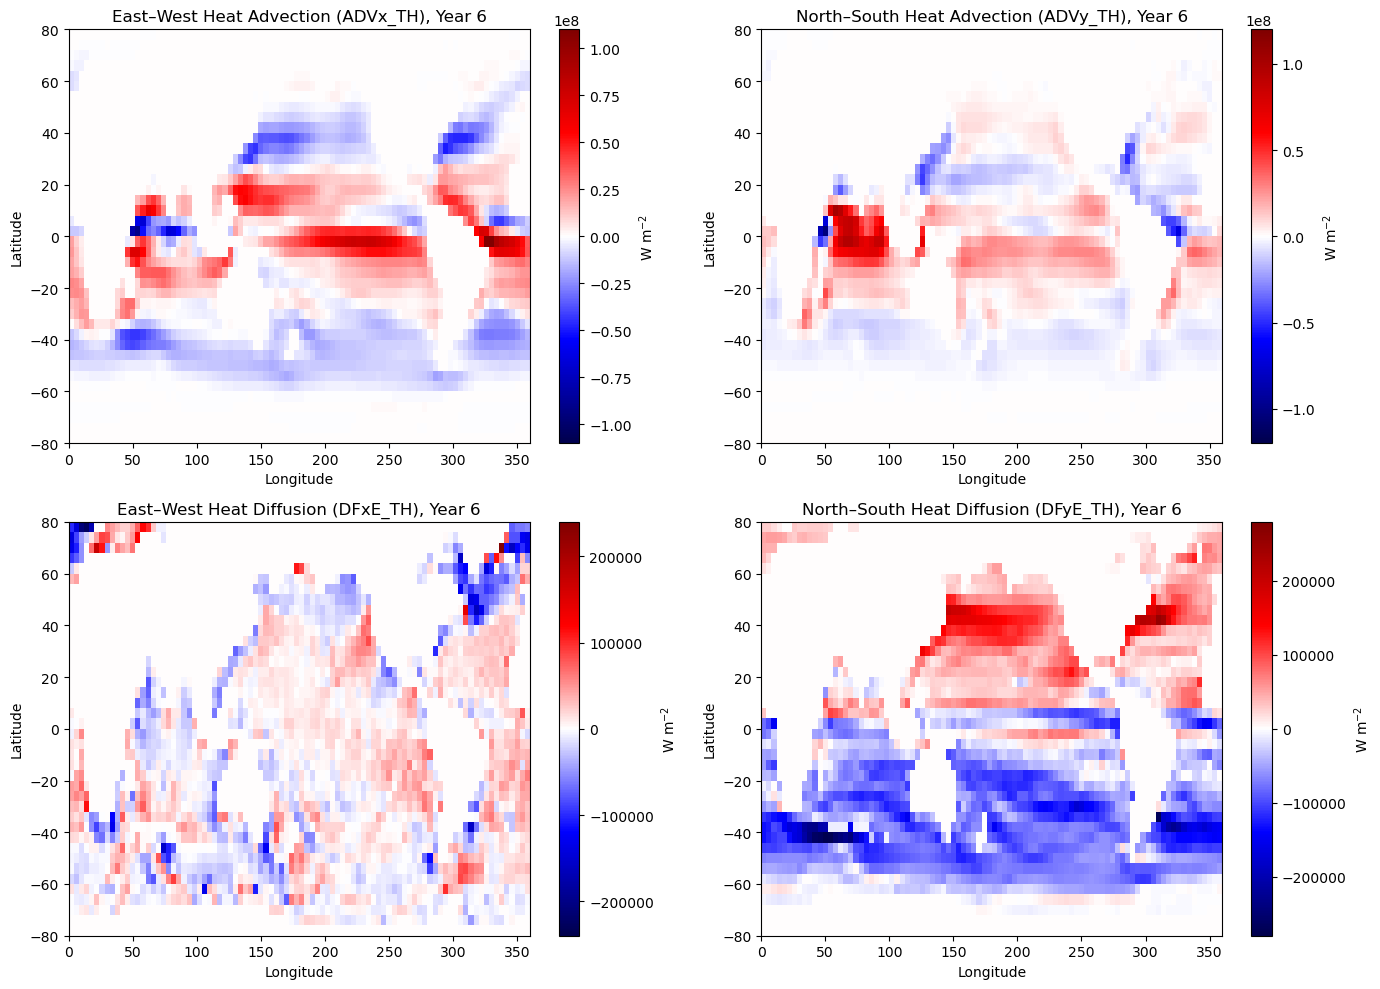

In [27]:
fig = plt.figure(figsize=(14,10))

# ADVx_TH
plt.subplot(2,2,1)
plt.pcolormesh(XC, YC, -1*ADVx_TH, cmap = 'seismic', vmin= -110000000.0, vmax=110000000.0, shading='nearest')
plt.colorbar(label='W m$^{-2}$')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('East–West Heat Advection (ADVx_TH), Year 6')

# ADVy_TH
plt.subplot(2,2,2)
plt.pcolormesh(XC, YC,-1*ADVy_TH, cmap = 'seismic', vmin = -120000000.0, vmax = 120000000.0, shading='nearest')
plt.colorbar(label='W m$^{-2}$')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('North–South Heat Advection (ADVy_TH), Year 6')

# DFxE_TH
plt.subplot(2,2,3)
plt.pcolormesh(XC, YC, DFxE_TH, cmap = 'seismic', vmin = -240000.0, vmax = 240000.0, shading='nearest')
plt.colorbar(label='W m$^{-2}$')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('East–West Heat Diffusion (DFxE_TH), Year 6')

# DFyE_TH
plt.subplot(2,2,4)
plt.pcolormesh(XC, YC, DFyE_TH, cmap = 'seismic', vmin = -280000.0, vmax = 280000.0, shading='nearest')
plt.colorbar(label='W m$^{-2}$')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('North–South Heat Diffusion (DFyE_TH), Year 6')

plt.tight_layout()
plt.show()

## Part 6: Plot Magnitudes
To compare the differences advection and diffusion, we first need to compute the magnitude. The magnitude of a vector quantity is given by

$$
|\textbf{v}| = \sqrt{v_x^2 + v_y^2}
$$

Apply this formula to the fields above to produce fields of 2D advection and diffusion at the surface of the ocean.

In [28]:
hfacW_path = os.path.join(run_folder, 'hFacW.data')

# reshape the hFac field as appropriate
hfacW_file = np.fromfile(hfacW_path, '>f4').reshape((15, 40, 90))

hfacS_path = os.path.join(run_folder, 'hFacS.data')

# reshape the hFac field as appropriate
hfacS_file = np.fromfile(hfacS_path, '>f4').reshape((15, 40, 90))
ADVx_masked = np.ma.masked_where(hfacW_file[0,:,:]==0, ADVx_TH)
ADVy_masked = np.ma.masked_where(hfacS_file[0,:,:]==0, ADVy_TH)
DFxE_masked = np.ma.masked_where(hfacW_file[0,:,:]==0, DFxE_TH)
DFyE_masked = np.ma.masked_where(hfacS_file[0,:,:]==0, DFyE_TH)

In [29]:
# conduct your calculation here

advective_magnitude  = np.sqrt((ADVx_masked)**2 + (ADVy_masked)**2)
diffusive_magnitude = np.sqrt((DFxE_masked)**2 + (DFyE_masked)**2)

print(advective_magnitude)
print(diffusive_magnitude)

vmin_advective_magnitude = np.min(advective_magnitude)
vmax_advective_magnitude = np.max(advective_magnitude)
print('advective_magnitude:')
print(vmin_advective_magnitude)
print(vmax_advective_magnitude)
print()

vmin_diffusive_magnitude = np.min(diffusive_magnitude)
vmax_diffusive_magnitude = np.max(diffusive_magnitude)
print('diffusive_magnitude:')
print(vmin_diffusive_magnitude)
print(vmax_diffusive_magnitude)
print()


[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [957002.1312813034 1718929.7718343528 2299240.693851974 ...
  1158443.0755348054 339523.43456755934 484216.1038583025]
 [721465.3955330973 672301.64556234 575637.0985925726 ...
  379459.7193453382 574908.4487368615 714528.9682283476]
 [117534.53441554058 193295.7115000304 348924.1736465752 ...
  61943.81941393899 14252.007833033003 68929.56725371133]]
[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [140851.28455488538 113614.73524072305 67149.30813629793 ...
  139922.5461744459 114167.95542522681 140900.88575911676]
 [149497.2912996279 103409.2213338887 71146.3614271628 ...
  93729.03191091865 134710.9205449506 143949.72725983302]
 [104030.20585277688 145184.9725841134 210303.95136563721 ...
  64178.60645300084 65422.316031824885 61570.51743662118]]
advective_magnitude:
9169.473266651725
131404765.48362736

diffusive_magnitude:
140.7286857693221
276609.0856477074



Now, plot the magnitudes of advection and diffusion. Since we are now working with magnitude rather than directional values, you should use a sequential colormap rather than a divergent colormap.

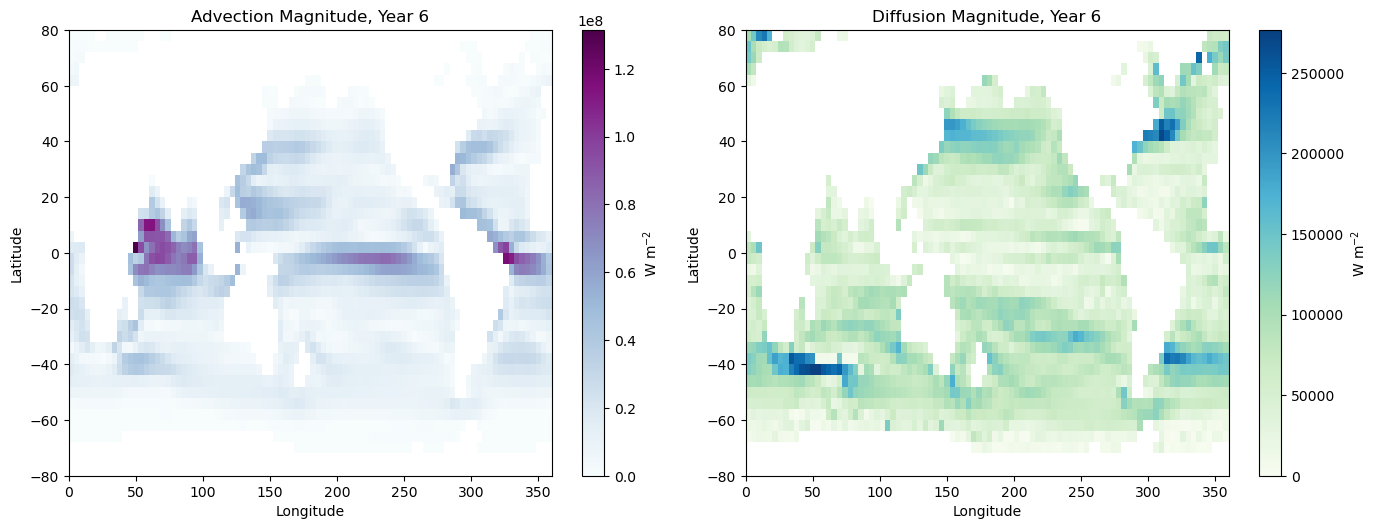

In [30]:
fig = plt.figure(figsize=(14,10))

# Advection
plt.subplot(2,2,1)
plt.pcolormesh(XC, YC, advective_magnitude, cmap = 'BuPu', vmin= 0, vmax=131404760.0, shading='nearest')
plt.colorbar(label='W m$^{-2}$')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Advection Magnitude, Year 6')

# Diffusion
plt.subplot(2,2,2)
plt.pcolormesh(XC, YC,diffusive_magnitude, cmap = 'GnBu', vmin = 0, vmax = 276609.1, shading='nearest')
plt.colorbar(label='W m$^{-2}$')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Diffusion Magnitude, Year 6')


plt.tight_layout()
plt.show()

What is the mean ratio between advection and diffusion of temperature? Do a quick calculation below to compute the ratio. Be sure not to include points on land where the magnitude of each is 0.

In [31]:
ratio = np.ma.masked_where((advective_magnitude.mask | diffusive_magnitude.mask | (diffusive_magnitude <= 0)),
    advective_magnitude / diffusive_magnitude)

print("mean ratio: ", float(np.mean(ratio)))

mean ratio:  451.2568915174651


## Part 7: Advection vs Diffusion
In the calculation above, we see that one process is responsible for transporting much more heat than the other. Which process is larger?

Suppose you would like to simplify the ocean model to be less computationally expensive. One way that you could achieve this is by removing processes from the model which have less of an effect on the model behavior than others. Based on the above plots and calculations, which process would you remove? Specifically, in the equation written in part 1, which term would you cancel from the equation?

According to the calculation above, advection is much more influential than diffusion for transporting heat (~450x stronger). To make the model less computationally expensive, the diffusive process. I would remove the diffusion term from the original equation (k*d^2$\Theta$/dt^2). 

